In [ ]:
!pip install cupy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [5]:
# ************************ Written by Alireza ************************************
import numpy as np
import time
import cupy as cp

# Define the matrix sizes
matrix_size = 1000
matrix_a = np.random.rand(matrix_size, matrix_size)
matrix_b = np.random.rand(matrix_size, matrix_size)

# CPU Matrix Multiplication
def cpu_matrix_multiplication(matrix_a, matrix_b):
    start_time = time.time()

    # Perform matrix multiplication using CPU
    cpu_result = np.dot(matrix_a, matrix_b)

    end_time = time.time()
    execution_time = end_time - start_time
    return cpu_result, execution_time

# GPU Matrix Multiplication
def gpu_matrix_multiplication(matrix_a, matrix_b):
    start_time = time.time()

    # Perform matrix multiplication using GPU
    gpu_matrix_a = cp.asarray(matrix_a)
    gpu_matrix_b = cp.asarray(matrix_b)
    gpu_result = cp.dot(gpu_matrix_a, gpu_matrix_b)
    cpu_result = cp.asnumpy(gpu_result)

    end_time = time.time()
    execution_time = end_time - start_time
    return cpu_result, execution_time

# Run CPU Matrix Multiplication
cpu_result, cpu_execution_time = cpu_matrix_multiplication(matrix_a, matrix_b)

# Run GPU Matrix Multiplication
gpu_result, gpu_execution_time = gpu_matrix_multiplication(matrix_a, matrix_b)

# Compare the results (optional)
print("CPU Result:")
print(cpu_result)
print("GPU Result:")
print(gpu_result)

# Print the execution times
print("CPU Execution Time:", cpu_execution_time, "seconds")
print("GPU Execution Time:", gpu_execution_time, "seconds")


CPU Result:
[[255.20576112 255.69551587 251.00554178 ... 242.8790149  250.16563189
  251.93132184]
 [245.55286155 251.65157126 245.68481694 ... 244.71254502 246.16585083
  258.39193224]
 [245.38311592 254.11991381 245.17287419 ... 238.55273983 250.82693789
  247.30295209]
 ...
 [246.67990243 249.34341808 249.04465855 ... 240.42331172 248.27264729
  253.39401807]
 [252.82420902 257.19248501 250.12289419 ... 244.45628218 249.78902983
  254.43654837]
 [247.42690999 258.34606296 251.98430031 ... 247.64035183 252.54561608
  259.75816311]]
GPU Result:
[[255.20576112 255.69551587 251.00554178 ... 242.8790149  250.16563189
  251.93132184]
 [245.55286155 251.65157126 245.68481694 ... 244.71254502 246.16585083
  258.39193224]
 [245.38311592 254.11991381 245.17287419 ... 238.55273983 250.82693789
  247.30295209]
 ...
 [246.67990243 249.34341808 249.04465855 ... 240.42331172 248.27264729
  253.39401807]
 [252.82420902 257.19248501 250.12289419 ... 244.45628218 249.78902983
  254.43654837]
 [247.42

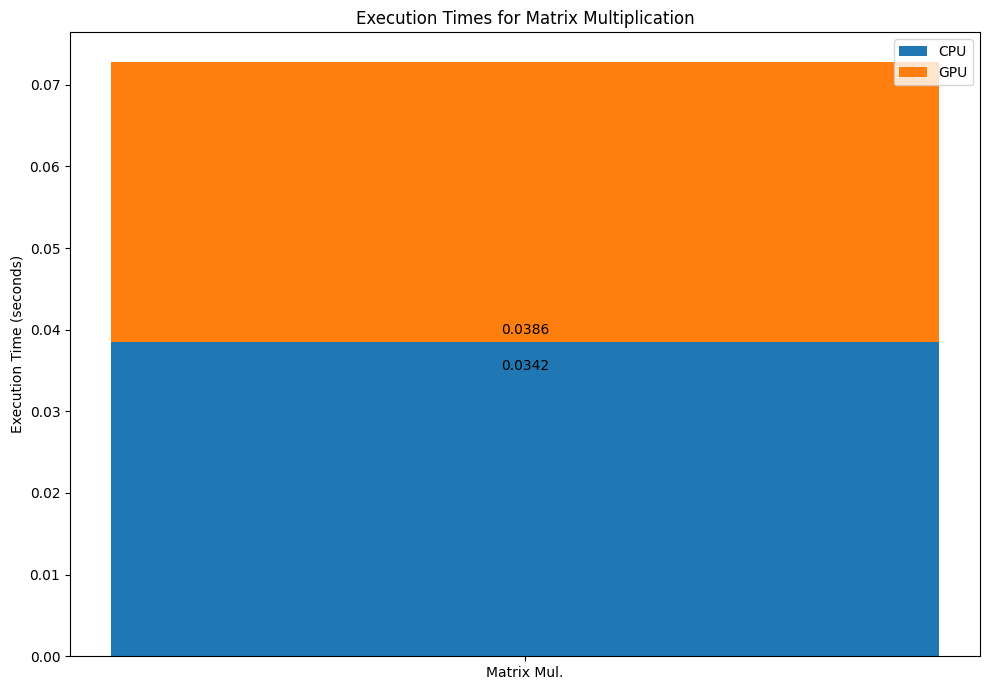

In [8]:
import matplotlib.pyplot as plt

# Matrix multiplication times
cpu_times_matrix = [cpu_execution_time]
gpu_times_matrix = [gpu_execution_time]

# Data labels
labels = ['Matrix Mul.']

x = range(len(cpu_times_matrix))  # the label locations

# Size of the figure
fig, ax = plt.subplots(figsize=(10, 7))

# Plot bars for CPU and GPU times
bar1 = ax.bar(x, cpu_times_matrix, width=0.35, label='CPU')
bar2 = ax.bar(x, gpu_times_matrix, width=0.35, bottom=cpu_times_matrix, label='GPU')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Execution Time (seconds)')
ax.set_title('Execution Times for Matrix Multiplication')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to generate labels on the bars
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

fig.tight_layout()
plt.show()
